In [46]:
%reload_ext autoreload
%autoreload 2
    
from active_learning import *
from concept import *
from util import performance_curve_difference
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 3-feature case: EIG vs Self-teaching

In [4]:
n_feature = 3
basis = concept_basis(n_feature)
basis_size = 2**n_feature

In [5]:
basis = np.array(basis)
eig_winning_concept = []
eig_winning_score = []
st_winning_concept = []
st_winning_score = []
tol = 1e-6
count = 0
for n_concept in range(2, basis_size+1):
    list_of_concepts_to_include = combinations(np.arange(basis_size), n_concept)
    for ind, concept_list in enumerate(list_of_concepts_to_include):
        concept_space = basis[list(concept_list)]
        # print(concept_space)
        perf_eig = average_performance(np.array(concept_space), method='eig')
        perf_st = average_performance(np.array(concept_space), method='self-teach')
        judge = np.sum(perf_eig - perf_st)
        # print(judge)
        if judge > tol:
            eig_winning_concept.append(concept_space)
            eig_winning_score.append(judge)
        if judge < -tol:
            st_winning_concept.append(concept_space)
            st_winning_score.append(judge)
        count += 1
        print("Number of concept at {}; total simulated at this number is at {}".format(n_concept, ind+1), end='\r')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:88: RuntimeWarning: invalid value encountered in true_divide
  score = full_post*teacher_prior*rep_prior/rep_z


In [6]:
print(count)
print(eig_winning_score)
print(st_winning_score)
# None of the 3-feature concept spaces produces a winner between EIG and Self-teaching

247
[]
[]


## 4-feature case: EIG vs Self-teaching

In [7]:
n_feature = 4
basis = concept_basis(n_feature)
basis_size = 2**n_feature

In [8]:
basis = np.array(basis)
eig_winning_concept = []
eig_winning_score = []
st_winning_concept = []
st_winning_score = []
tol = 1e-6
count = 0
for n_concept in range(2, basis_size+1):
    list_of_concepts_to_include = combinations(np.arange(basis_size), n_concept)
    for ind, concept_list in enumerate(list_of_concepts_to_include):
        concept_space = basis[list(concept_list)]
        # print(concept_space)
        perf_eig = average_performance(np.array(concept_space), method='eig')
        perf_st = average_performance(np.array(concept_space), method='self-teach')
        judge = np.sum(perf_eig - perf_st)
        # print(judge)
        if judge > tol:
            eig_winning_concept.append(concept_space)
            eig_winning_score.append(judge)
        if judge < -tol:
            st_winning_concept.append(concept_space)
            st_winning_score.append(judge)
        count += 1
        print("Number of concept at {}; total simulated at this number is at {}".format(n_concept, ind+1), end='\r')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:88: RuntimeWarning: invalid value encountered in true_divide
  score = full_post*teacher_prior*rep_prior/rep_z


In [10]:
print(count)
print(len(eig_winning_score))
print(len(st_winning_score))

65519
1199
941


In [36]:
# np.save('eig_vs_st_eig_winning_score_4_feature', eig_winning_score)
# np.save('eig_vs_st_eig_winning_concept_4_feature', eig_winning_concept)
# np.save('eig_vs_st_st_winning_score_4_feature', st_winning_score)
# np.save('eig_vs_st_st_winning_concept_4_feature', st_winning_concept)

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:88: RuntimeWarning: invalid value encountered in true_divide
  score = full_post*teacher_prior*rep_prior/rep_z
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


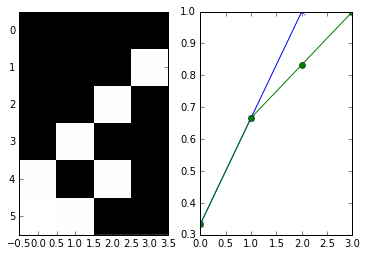

In [37]:
cs = np.array(st_winning_concept[3])
plt.subplot(1,2,1)
# plt.imshow(col_sort_features(row_sort_concepts(cs)), interpolation='None', cmap='gray')
plt.imshow(cs, interpolation='None', cmap='gray')
plt.subplot(1,2,2)
perf_st = average_performance(np.array(cs), method='self-teach')
perf_eig = average_performance(np.array(cs), method='eig')
plt.plot(perf_st, '-x')
plt.hold(True)
plt.plot(perf_eig, '-o')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:88: RuntimeWarning: invalid value encountered in true_divide
  score = full_post*teacher_prior*rep_prior/rep_z
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


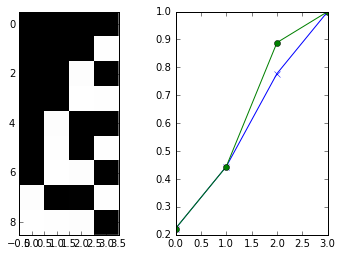

In [30]:
cs = np.array(eig_winning_concept[0])
plt.subplot(1,2,1)
# plt.imshow(col_sort_features(row_sort_concepts(cs)), interpolation='None', cmap='gray')
plt.imshow(cs, interpolation='None', cmap='gray')
plt.subplot(1,2,2)
perf_st = average_performance(np.array(cs), method='self-teach')
perf_eig = average_performance(np.array(cs), method='eig')
plt.plot(perf_st, '-x')
plt.hold(True)
plt.plot(perf_eig, '-o')

## 3-feature case: EIG vs EPG

In [38]:
n_feature = 3
basis = concept_basis(n_feature)
basis_size = 2**n_feature

In [39]:
basis = np.array(basis)
eig_winning_concept = []
eig_winning_score = []
epg_winning_concept = []
epg_winning_score = []
tol = 1e-6
count = 0
for n_concept in range(2, basis_size+1):
    list_of_concepts_to_include = combinations(np.arange(basis_size), n_concept)
    for ind, concept_list in enumerate(list_of_concepts_to_include):
        concept_space = basis[list(concept_list)]
        # print(concept_space)
        perf_eig = average_performance(np.array(concept_space), method='eig')
        perf_epg = average_performance(np.array(concept_space), method='epg')
        judge = np.sum(perf_eig - perf_epg)
        # print(judge)
        if judge > tol:
            eig_winning_concept.append(concept_space)
            eig_winning_score.append(judge)
        if judge < -tol:
            epg_winning_concept.append(concept_space)
            epg_winning_score.append(judge)
        count += 1
        print("Number of concept at {}; total simulated at this number is at {}".format(n_concept, ind+1), end='\r')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


In [40]:
print(count)
print(len(eig_winning_score))
print(len(epg_winning_score))

247
48
0


/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


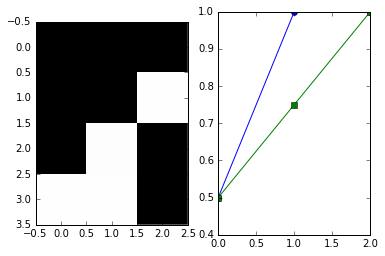

In [42]:
cs = np.array(eig_winning_concept[1])
plt.subplot(1,2,1)
plt.imshow(cs, interpolation='None', cmap='gray')
plt.subplot(1,2,2)
perf_eig = average_performance(np.array(cs), method='eig')
perf_epg = average_performance(np.array(cs), method='epg')
plt.plot(perf_eig, '-o')
plt.hold(True)
plt.plot(perf_epg, '-s')

# Try PCA

In [47]:
n_feature = 3
basis = concept_basis(n_feature)
basis_size = 2**n_feature
basis = np.array(basis)
concept_space_collection = []
score_collection = []
count = 0
for n_concept in range(2, basis_size+1):
    list_of_concepts_to_include = combinations(np.arange(basis_size), n_concept)
    for ind, concept_list in enumerate(list_of_concepts_to_include):
        concept_space = basis[list(concept_list)]
        perf_eig = average_performance(np.array(concept_space), method='eig')
        perf_epg = average_performance(np.array(concept_space), method='epg')
        score_collection.append(np.sum(perf_eig - perf_epg))
        concept_space_collection.append(concept_space)
        count += 1
        print("Number of concept at {}; total simulated at this number is at {}".format(n_concept, ind+1), end='\r')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


In [62]:
# extend shorter concept spaces to be the maximum size
flattend_extended_concept_space = np.zeros([count, n_feature*(2**n_feature)])
cs_size = np.zeros(count) 
for ind, cs in enumerate(concept_space_collection):
    vec = cs.flatten()
    flattend_extended_concept_space[ind,0:len(vec)] = vec
    cs_size[ind] = len(cs)

In [53]:
# plt.imshow(flattend_extended_concept_space, interpolation="none", cmap='gray')

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(flattend_extended_concept_space)

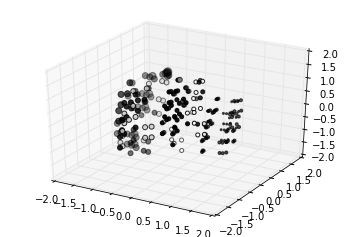

In [151]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=score_collection, cmap=plt.cm.gray, s=cs_size**2)

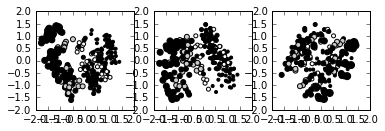

In [152]:
plt.subplot(1,3,1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=score_collection, cmap=plt.cm.gray, s=cs_size**2)
plt.gca().set_aspect('equal', adjustable='box')
plt.subplot(1,3,2)
plt.scatter(x_pca[:, 0], x_pca[:, 2], c=score_collection, cmap=plt.cm.gray, s=cs_size**2)
plt.gca().set_aspect('equal', adjustable='box')
plt.subplot(1,3,3)
plt.scatter(x_pca[:, 1], x_pca[:, 2], c=score_collection, cmap=plt.cm.gray, s=cs_size**2)
plt.gca().set_aspect('equal', adjustable='box')

In [206]:
from copy import copy
comp1 = copy(pca.components_[0])
comp1[comp1 > pca.components_[0].mean()] = 1.
comp1[comp1 < pca.components_[0].mean()] = 0.
comp1 = comp1.reshape([2**n_feature, n_feature])
# plt.imshow(comp1, interpolation="None", cmap='gray')
print(comp1)

[[1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [207]:
comp2 = copy(pca.components_[1])
comp2[comp2 > pca.components_[1].mean()] = 1.
comp2[comp2 < pca.components_[1].mean()] = 0.
comp2 = comp2.reshape([2**n_feature, n_feature])
# plt.imshow(comp2, interpolation="None", cmap='gray')
print(comp2)

[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


# Try logistic regression

In [189]:
from sklearn.linear_model import LogisticRegression
X = flattend_extended_concept_space
y = np.zeros_like(score_collection)
y[np.array(score_collection) > 1e-6] = 1.
print(x.shape)
print(y.shape)
clf = LogisticRegression().fit(X, y)
clf.score(X, y)

(247, 24)
(247,)


0.8582995951417004

[[-0.53276352  0.31659661 -0.05899604  0.23091285 -1.36754443 -0.87318137
  -1.18066701  0.13424362  0.10238346  1.38407106  1.09556785  0.54467297
   0.51961184  0.12851227  0.34493506 -1.32219902 -1.09897789 -0.75016013
  -0.31158103 -0.31158103 -0.21781058 -0.04395324 -0.04395324 -0.04395324]]
[-1.67335525]
1
[[0. 1. 1.]
 [1. 0. 0.]
 [0. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]


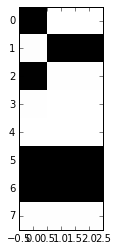

In [213]:
print(clf.coef_)
print(clf.intercept_)
print(clf.intercept_scaling)
comp = copy(clf.coef_)
comp[comp > clf.coef_.mean()] = 1.
comp[comp < clf.coef_.mean()] = 0.
comp = comp.reshape([2**n_feature, n_feature])
plt.imshow(comp, interpolation="None", cmap='gray')
print(comp)

# Try SVM

In [191]:
from sklearn.svm import SVC
svm = SVC(kernel='linear') #linear higher than all other built-in ones including rbf
svm.fit(X, y)
svm.score(X, y)

0.8825910931174089

In [227]:
print(svm.coef_.shape)
print(svm.coef_)
print(svm.intercept_)
# https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights
# coef_ are the vector that is orthogonal to the separating hyperplane, which is what I wanted

(1, 24)
[[-1.00e+00  6.68e-05 -1.82e-05  1.47e+00 -5.28e-01 -2.24e-04 -9.62e-01
   3.48e-01  3.48e-01  1.12e+00  1.31e+00  1.80e-01  7.03e-01 -5.69e-01
   4.49e-02 -7.28e-01 -3.87e-01 -3.41e-01 -1.75e-04 -1.75e-04  0.00e+00
   0.00e+00  0.00e+00  0.00e+00]]
[-2.47]


In [231]:
print(svm.support_)
print(svm.n_support_)

[  3   4   9  14  15  18  19  84  85  90  94  95  96  97  98 101 108 114
 115 122 127 128 134 136 143 144 147 152 153 160 161 162 163 165 166 167
 169 172 173 174 176 177 178 183 187 189 191 192 198 210 213 238  86  87
  88  89  91  92  99 100 102 116 117 118 119 120 121 135 137 138 145 146
 148 149 150 151 154 155 156 157 158 159 164 168 170 171 175 179 180 182
 188 193 194 200 202 203 206 207]
[52 46]


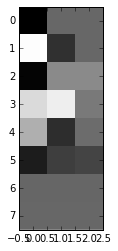

In [232]:
comp = copy(svm.coef_)
# comp[comp > svm.coef_.mean()] = 1.
# comp[comp < svm.coef_.mean()] = 0.
comp = comp.reshape([2**n_feature, n_feature])
plt.imshow(comp, interpolation="None", cmap='gray')

[[ 1. -0.  0.]
 [-2.  1.  0.]
 [ 1. -0. -0.]
 [-2. -2. -0.]
 [-1.  1. -0.]
 [ 1.  1.  0.]
 [ 0.  0. -0.]
 [-0. -0. -0.]]


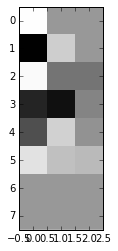

In [235]:
# https://en.wikipedia.org/wiki/Support-vector_machine (check the linear SVM section)
w = copy(svm.coef_)
w_mag = np.sqrt(np.linalg.norm(w, ord=2))
b = copy(svm.intercept_)
mid_concept = w*b/w_mag
mid_concept = mid_concept.reshape([2**n_feature, n_feature])
plt.imshow(mid_concept, interpolation="None", cmap='gray')
print(np.round(mid_concept))

# Try GP classification

In [179]:
from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier().fit(X, y)
gpc.score(X, y)

ImportError: cannot import name 'GaussianProcessClassifier'

# Try MDS

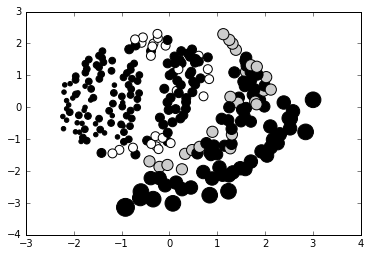

In [97]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, metric=True) #metric=False gives pretty bad result
x_mds = embedding.fit_transform(flattend_extended_concept_space)
plt.scatter(x_mds[:, 0], x_mds[:, 1], c=score_collection, cmap=plt.cm.gray, s=5*cs_size**2)

# Try smacof

In [87]:
hamming_matrix = np.zeros([count,count])
for ind1, vec1 in enumerate(flattend_extended_concept_space):
    for ind2, vec2 in enumerate(flattend_extended_concept_space):
        hamming_matrix[ind1,ind2] = np.sum(np.abs(vec1-vec2))

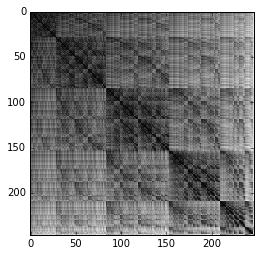

In [89]:
plt.imshow(hamming_matrix, interpolation='none', cmap='gray')

In [94]:
from sklearn.manifold import smacof
x_smacof = smacof(hamming_matrix)

ImportError: cannot import name 'smacof'

# Try Isomap

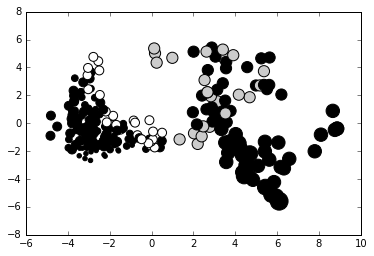

In [98]:
from sklearn.manifold import Isomap
embedding = Isomap()
x_iso = embedding.fit_transform(flattend_extended_concept_space)
plt.scatter(x_iso[:, 0], x_iso[:, 1], c=score_collection, cmap=plt.cm.gray, s=5*cs_size**2)

# Try LLE

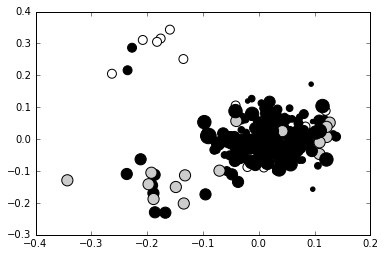

In [112]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_neighbors=6, n_components=2, method='modified')
x_lle = embedding.fit_transform(flattend_extended_concept_space)
noise_x = np.random.randn(count)*0.05
noise_y = np.random.randn(count)*0.05
plt.scatter(x_lle[:,0]+noise_x, x_lle[:,1]+noise_y, c=score_collection, cmap=plt.cm.gray, s=5*cs_size**2)

# Try spectral embedding

/Users/CoDaS/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/graph.py:115: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, np.int)


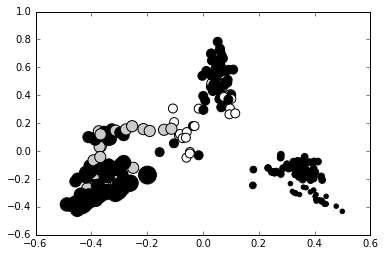

In [105]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding()
x_spec = embedding.fit_transform(flattend_extended_concept_space)
plt.scatter(x_spec[:, 0], x_spec[:, 1], c=score_collection, cmap=plt.cm.gray, s=5*cs_size**2)

# Try TSNE

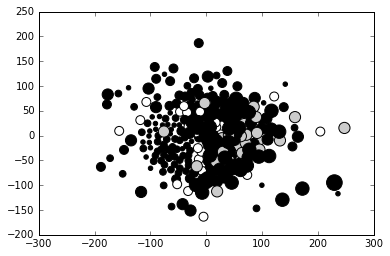

In [106]:
from sklearn.manifold import TSNE
embedding = TSNE()
x_tsne = embedding.fit_transform(flattend_extended_concept_space)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=score_collection, cmap=plt.cm.gray, s=5*cs_size**2)

## 4-feature case: EIG vs EPG

In [43]:
n_feature = 4
basis = concept_basis(n_feature)
basis_size = 2**n_feature

In [44]:
basis = np.array(basis)
eig_winning_concept = []
eig_winning_score = []
epg_winning_concept = []
epg_winning_score = []
tol = 1e-6
count = 0
for n_concept in range(2, basis_size+1):
    list_of_concepts_to_include = combinations(np.arange(basis_size), n_concept)
    for ind, concept_list in enumerate(list_of_concepts_to_include):
        concept_space = basis[list(concept_list)]
        # print(concept_space)
        perf_eig = average_performance(np.array(concept_space), method='eig')
        perf_epg = average_performance(np.array(concept_space), method='epg')
        judge = np.sum(perf_eig - perf_epg)
        # print(judge)
        if judge > tol:
            eig_winning_concept.append(concept_space)
            eig_winning_score.append(judge)
        if judge < -tol:
            epg_winning_concept.append(concept_space)
            epg_winning_score.append(judge)
        count += 1
        print("Number of concept at {}; total simulated at this number is at {}".format(n_concept, ind+1), end='\r')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


In [45]:
print(count)
print(len(eig_winning_score))
print(len(epg_winning_score))

65519
39963
0
